# Two-Way ANOVA
This test is used when you want to compare the means of multiple groups, but with two independent variables (factors). It helps you test:

Main effects of each factor (how each factor impacts the outcome on its own).

Interaction effect between the factors (how the two factors work together to impact the outcome).

📊 Example:
Let’s take a Flipkart case. Suppose Flipkart wants to see if the average order value is influenced by:

Platform (Mobile, Web, Smart TV)

State (Maharashtra, Delhi, Karnataka, Tamil Nadu)

We’re interested in:

The main effect of Platform: Does the platform affect the average order value?

The main effect of State: Does the state affect the average order value?

The interaction effect: Does the combination of Platform and State impact the order value differently than what we’d expect by just looking at the individual effects?

## 📌 Problem Statement
Flipkart wants to know how **Platform** and **State** influence the **order value**. They want to see if there's a significant interaction effect between Platform and State.

## 🧠 5W1H

- **What**: Average order value
- **Why**: To optimize marketing and product placement strategies
- **When**: Last quarter’s data
- **Where**: Maharashtra, Delhi, Karnataka, Tamil Nadu
- **Who**: 10,000 customers
- **How**: Two-Way ANOVA to test main effects and interaction


In [3]:
import pandas as pd
import numpy as np

np.random.seed(2025)

n = 10000
states = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu']
platforms = ['Mobile', 'Web', 'Smart TV']

df = pd.DataFrame({
    'Customer_ID': range(1, n+1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
})

# Simulate order value (different mean based on platform and state)
df['Order_Value'] = df.apply(lambda x: 
    np.random.normal(loc=2500, scale=800) if x['Platform'] == 'Mobile' and x['State'] == 'Maharashtra' else
    np.random.normal(loc=2300, scale=700) if x['Platform'] == 'Mobile' and x['State'] == 'Delhi' else
    np.random.normal(loc=2400, scale=750) if x['Platform'] == 'Web' and x['State'] == 'Karnataka' else
    np.random.normal(loc=2200, scale=650) if x['Platform'] == 'Smart TV' and x['State'] == 'Tamil Nadu' else
    np.random.normal(loc=2300, scale=700), axis=1)

df.head()


,Customer_ID,State,Platform,Order_Value
0,1,Karnataka,Mobile,2471.676085
1,2,Karnataka,Mobile,1700.909517
2,3,Karnataka,Mobile,3273.859716
3,4,Karnataka,Mobile,1051.550355
4,5,Maharashtra,Mobile,2884.313953


Customer_ID    0
State          0
Platform       0
Order_Value    0
dtype: int64
State           Delhi    Karnataka  Maharashtra   Tamil Nadu
Platform                                                    
Mobile    2297.144789  2258.607616  2479.490010  2287.252030
Smart TV  2306.777258  2315.901114  2341.707474  2206.840401
Web       2322.762257  2399.298771  2304.176014  2322.773494


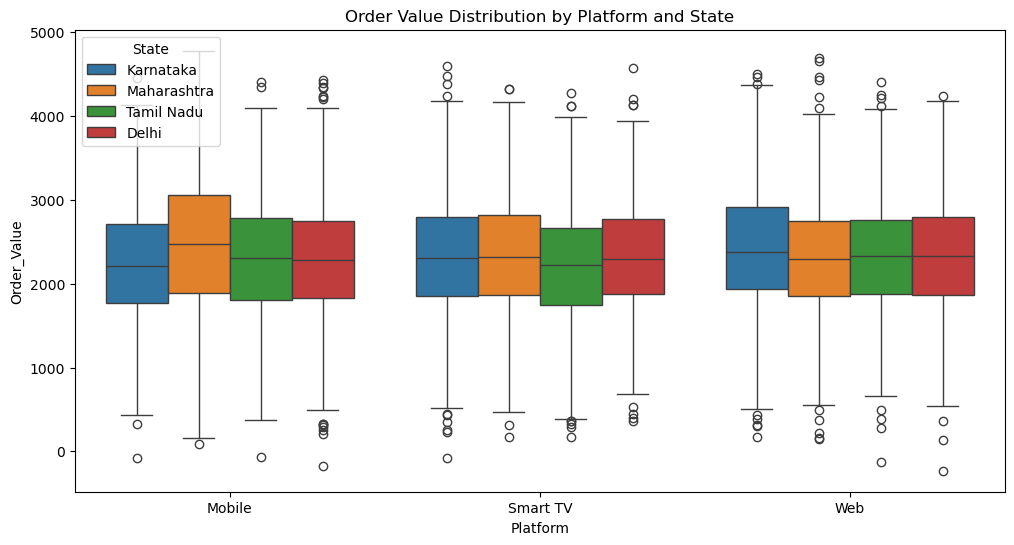

In [5]:
# Null check
print(df.isnull().sum())

# Mean order value by Platform and State
mean_values = df.groupby(['Platform', 'State'])['Order_Value'].mean().unstack()
print(mean_values)

# Boxplot for visualizing order value distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Platform', y='Order_Value', hue='State')
plt.title('Order Value Distribution by Platform and State')
plt.show()


In [7]:
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the model for Two-Way ANOVA
model = ols('Order_Value ~ C(Platform) + C(State) + C(Platform):C(State)', data=df).fit()

# Run the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                            sum_sq      df         F        PR(>F)
C(Platform)           3.703077e+06     2.0  3.711283  2.447987e-02
C(State)              1.381703e+07     3.0  9.231761  4.283986e-06
C(Platform):C(State)  2.561029e+07     6.0  8.555679  2.684271e-09
Residual              4.982959e+09  9988.0       NaN           NaN


## 🎯 Hypotheses

- **H₀ (null)**: There is no significant difference in **order value** based on **Platform**, **State**, or the interaction between them.
- **H₁ (alternative)**: At least one of the factors or their interaction has a significant impact on **order value**.

### 📈 Interpretation

- If **p-value** for **Platform** or **State** or the **interaction** is **< 0.05**, we reject the null hypothesis for that factor, indicating a significant effect.
- If **p-value** for all factors is **≥ 0.05**, fail to reject the null hypothesis, meaning **no significant impact** from either factor.

### 💼 Business Impact

- ✅ **Significant interaction effect**:
  - Adjust strategy based on platform-state combination, e.g., **Maharashtra + Mobile** has high order value → prioritize that combo for targeted promotions.
  
- ❌ **No significant effect**:
  - Marketing efforts can be uniform across platforms and states since the impact is not significant.
